In [ ]:
# Import libs
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# EDA

## Let's load and see the structure of dataset

In [2]:
heart_data = pd.read_csv("data/heart.csv")
saturation_data = pd.read_csv("data/o2Saturation.csv")

In [3]:
print(f"Shape of heart_data: {heart_data.shape}\nShape of saturation_data: {saturation_data.shape}")

Shape of heart_data: (303, 14)
Shape of saturation_data: (3585, 1)


### About this dataset
* Age : Age of the patient
* Sex : Sex of the patient (1:male, 0:female)
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
heart_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All features have int64 or float64 data-type; none of them has null value.

In [6]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
saturation_data.head(10)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
5,97.5
6,97.5
7,97.5
8,97.5
9,97.5


In [9]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


## Let's Visualize Patterns

In [10]:
heart_data["c_sex"] = heart_data["sex"].apply(lambda x: "male" if x == 1 else "female")
heart_data["exercise_induced_angina"] = heart_data["exng"].apply(lambda x: "yes" if x == 1 else "no")
heart_data["chest_pain_type"] = heart_data["cp"].apply(lambda x: "typical angina" if x == 0 else "atypical angina" if x == 1 else "non-anginal pain" if x == 2 else "asymptomatic")
heart_data["resting_electrocardiographic_results"] = heart_data["restecg"].apply(lambda x: "normal" if x == 0 else "having ST-T wave abnormality" if x ==1 else "showing probable or definite left ventricular hypertrophy by Estes' criteria")

heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,c_sex,exercise_induced_angina,chest_pain_type,resting_electrocardiographic_results
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,no,asymptomatic,normal
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,no,non-anginal pain,having ST-T wave abnormality
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,no,atypical angina,normal
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,no,atypical angina,having ST-T wave abnormality
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,yes,typical angina,having ST-T wave abnormality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,female,yes,typical angina,having ST-T wave abnormality
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,male,no,asymptomatic,having ST-T wave abnormality
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,male,no,typical angina,having ST-T wave abnormality
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,male,yes,typical angina,having ST-T wave abnormality


<AxesSubplot:xlabel='output', ylabel='count'>

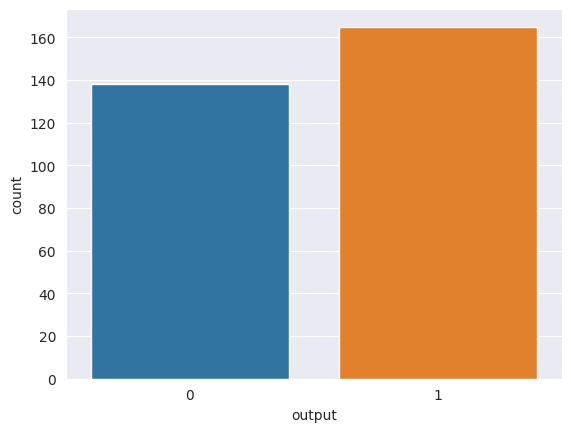

In [11]:
sns.countplot(data=heart_data, x="output")
plt.title("Number of output in the dataset")

Text(0.5, 1.0, 'Number of males and females in the dataset')

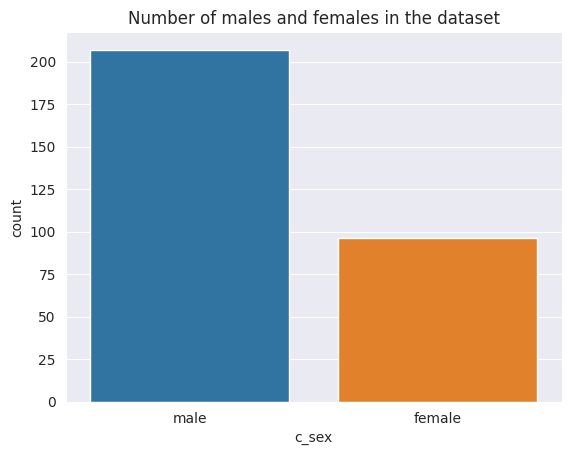

In [12]:
sns.countplot(data=heart_data, x="c_sex")
plt.title("Number of males and females in the dataset")

Text(0.5, 1.0, 'Mean age of the group: 54.37')

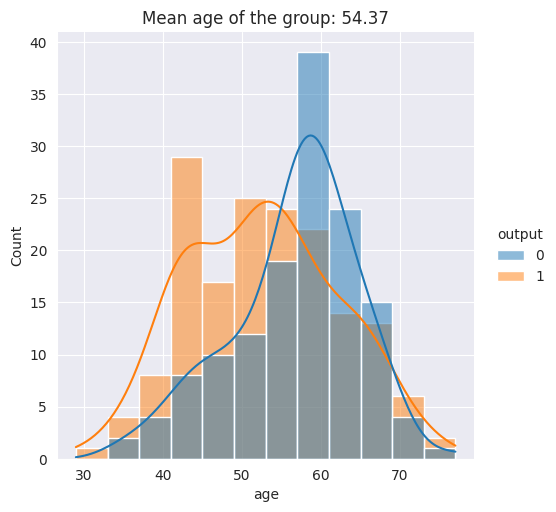

In [13]:
sns.displot(data=heart_data, x="age", kde=True, hue="output")
plt.title(f"Mean age of the group: {np.round(heart_data.age.mean(), 2)}")

Text(0.5, 1.0, 'Blood Pressure (Mean: 131.62)')

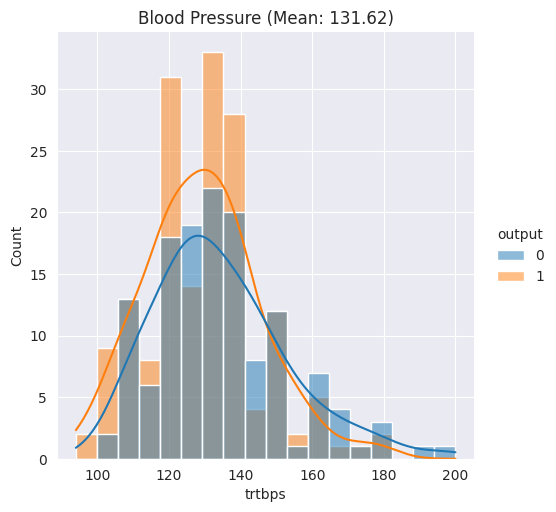

In [14]:
sns.displot(x="trtbps", data=heart_data, kde=True, hue="output")
plt.title(f"Blood Pressure (Mean: {np.round(heart_data.trtbps.mean(), 2)})")

Text(0.5, 1.0, 'Cholestoral level (Mean:246.26)')

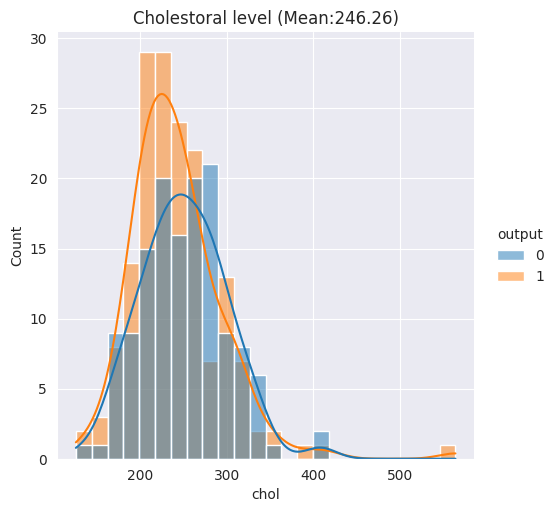

In [15]:
sns.displot(x="chol", data=heart_data, kde=True, hue="output")
plt.title(f"Cholestoral level (Mean:{np.round(heart_data.chol.mean(), 2)})")

There is no significant differences between healthy and heart disease patients in their cholesterol (mg/dl)

Text(0.5, 1.0, 'Heart rate (Mean: 149.65)')

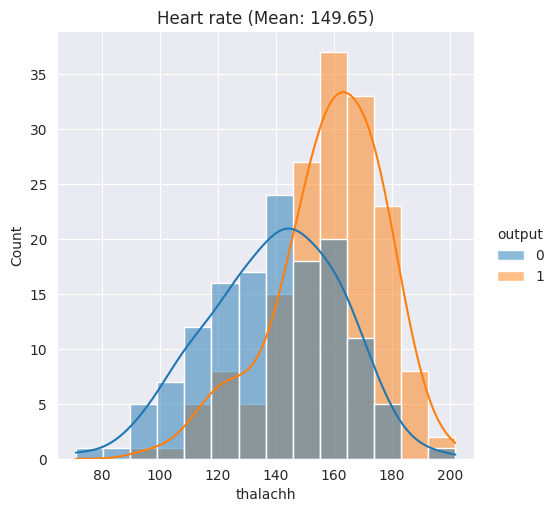

In [16]:
sns.displot(data=heart_data, x="thalachh", kde=True, hue="output")
plt.title(f"Heart rate (Mean: {np.round(heart_data.thalachh.mean(), 2)})")

There is higher risk of heart attack if the heart rate is higher than 155-160

Text(0.5, 1.0, 'Number of major vessels by age')

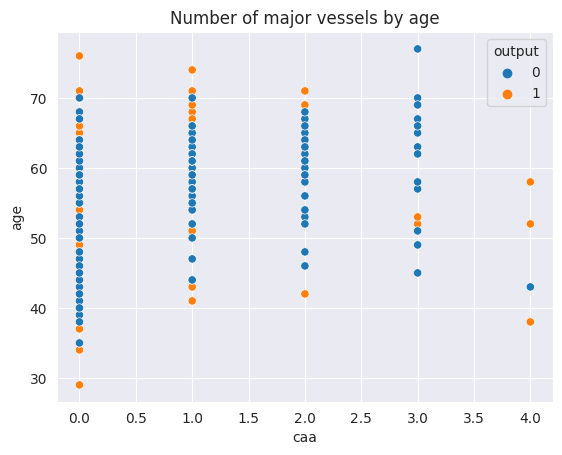

In [17]:
sns.scatterplot(data=heart_data, x="caa", y="age", hue="output")
plt.title("Number of major vessels by age")

It seems that major vessels don't appear in young people(<40)

Text(0.5, 1.0, 'Number of major vessel by heart attack risk')

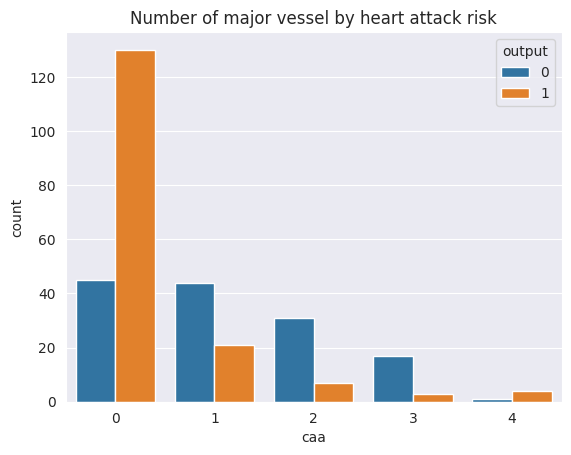

In [18]:
sns.countplot(x="caa", data=heart_data, hue="output")
plt.title("Number of major vessel by heart attack risk")

Most of the patient with heart disease detected with zero number of major vessel

(array([0, 1, 2, 3]),
 [Text(0, 0, 'asymptomatic'),
  Text(1, 0, 'non-anginal pain'),
  Text(2, 0, 'atypical angina'),
  Text(3, 0, 'typical angina')])

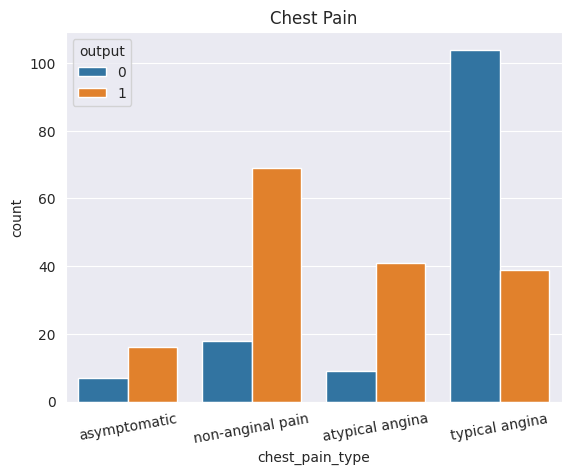

In [19]:
sns.countplot(x="chest_pain_type", data=heart_data, hue="output")
plt.title("Chest Pain")
plt.xticks(rotation=10)

Typical angina chest pain only one shows significant number of healthy patients compare to other types.

Text(0.5, 1.0, 'Fasting blood sugar >= 120(1=True, 0=False)')

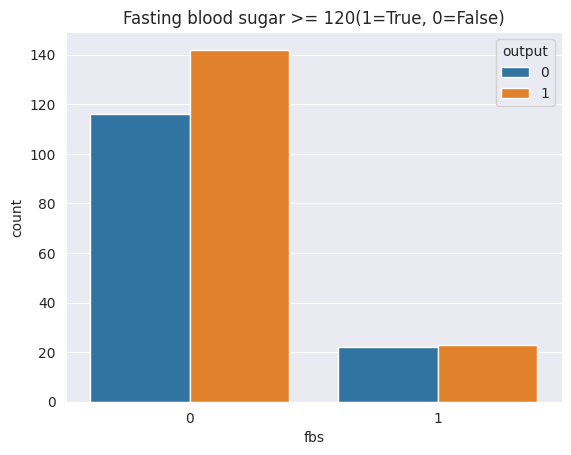

In [20]:
sns.countplot(data=heart_data, x="fbs", hue="output")
plt.title("Fasting blood sugar >= 120(1=True, 0=False)")

There is no significant differences between healthy and heart disease patients in their fasting blood sugar, whether it is more or less than 120 mg/dl.

Text(0.5, 1.0, 'Resting electrocardiographic results')

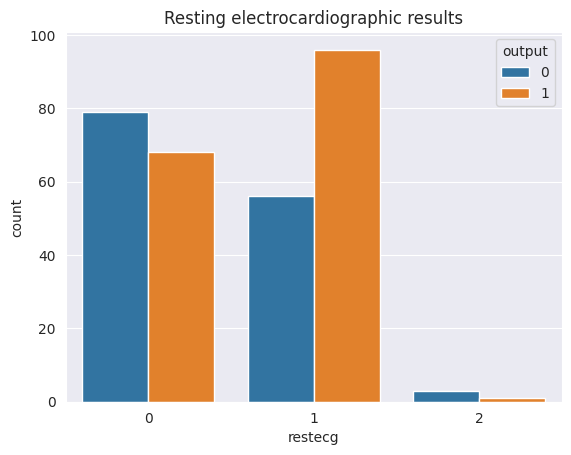

In [21]:
sns.countplot(data=heart_data, x="restecg", hue="output")
plt.title("Resting electrocardiographic results")

Text(0.5, 1.0, 'Exercise induced angina')

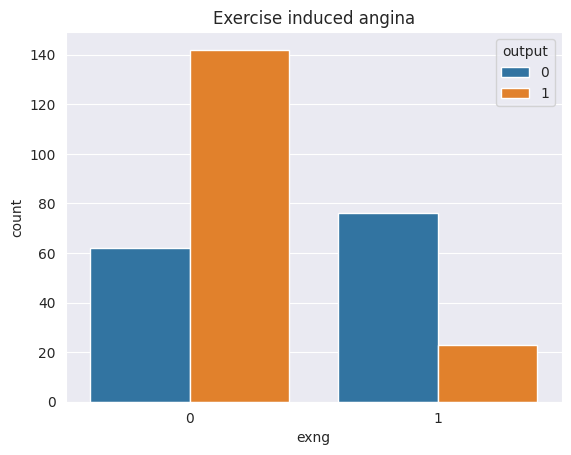

In [22]:
sns.countplot(data=heart_data, x="exng", hue="output")
plt.title("Exercise induced angina")

Most of the patient with heart attack disease were detected with no exercise induced angina

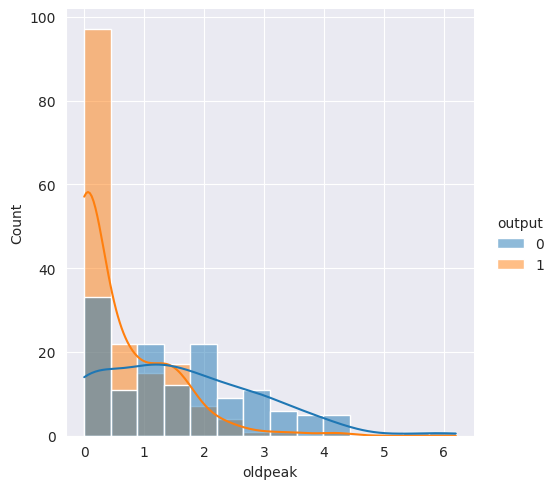

In [23]:
sns.displot(data=heart_data, x="oldpeak", hue="output", kde=True)


I don't know what oldpeak stands for but most of the patient with heart attack disease detected with zero oldpeak.

<AxesSubplot:xlabel='age', ylabel='thalachh'>

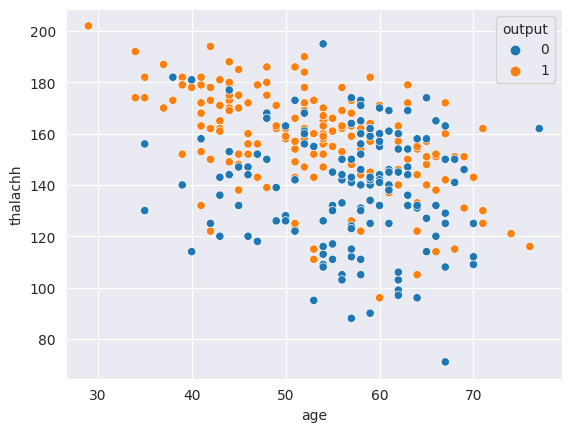

In [24]:
sns.scatterplot(data=heart_data, x="age", y="thalachh", hue="output")

It seems that heart rate becomes lower as person aging

Calculating Person's scorrelation matrix

>NOTE: When dealing with data with dozens of hundreds of features one important tool is to look at the correlations between different features as a heat map. Although it is easy to generate a correlation heat map, not all such visualizations are created equal. Here are some rules of thumb to keep in mind:
>   * Limit the range of the color map to the middle `99.x%` of the values
>   * Use symmetric magnitude bounds
>   * Use a divergent color map
>   * Make 0 correlation correspond to a dull dark color (dark grey), and high magnitude correlations high luminance
>   * Different orderings of the features can have a huge impact, pick wisely
> Using these guidelines together almost always improves the overall quality of the visualization of a correlation or covariance matrix.
>
>
> Link: http://asymptoticlabs.com/blog/posts/tips-for-visualizing-correlation-matrices.html
>

But for now, I'll use standard seaborn heatmap function as amount of features is pretty low.


In [25]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'c_sex',
       'exercise_induced_angina', 'chest_pain_type',
       'resting_electrocardiographic_results'],
      dtype='object')

/tmp/ipykernel_15607/1503199139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_data.corr(), cmap = sns.diverging_palette(20, 220, n=256), annot=True)


<AxesSubplot:>

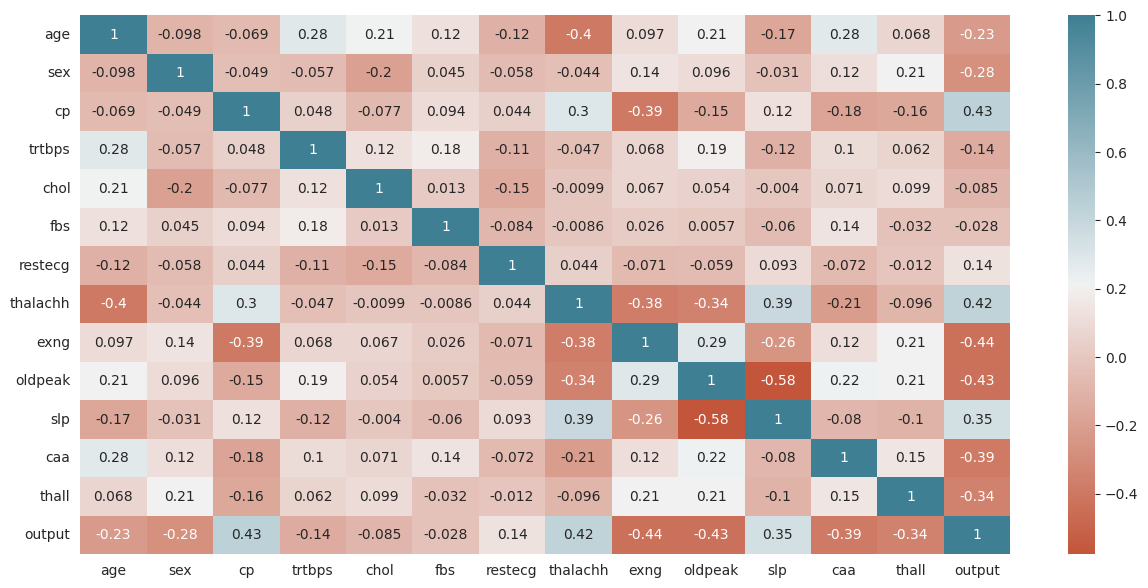

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(heart_data.corr(), cmap = sns.diverging_palette(20, 220, n=256), annot=True)

As you can see there is no strong correlation between independent continuous variables.

# Modelling

In [27]:
# Let's import modules tp produce model

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [28]:
df = pd.read_csv("data/heart.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [29]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


> *NOTE:* Most algorithms (linear regression, logistic regression, neural network, support vector machine, etc.) require some sort of the encoding on categorical variables. This is because most algorithms only take numerical values as inputs. Algorithms that do not require an encoding are algorithms that can directly deal with joint discrete distributions such as Markov chain / Naive Bayes / Bayesian network, tree based, etc.

In [30]:
X = df.drop("output", axis=1)
y = df["output"]
X.shape, y.shape

((303, 13), (303,))

In [31]:
X = pd.get_dummies(X, columns = cat_cols, drop_first=True)
X.shape, X.columns

((303, 22),
 Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_1', 'exng_1',
        'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3', 'fbs_1',
        'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1', 'thall_2',
        'thall_3'],
       dtype='object'))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=55)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 22), (76, 22), (227,), (76,))

In [33]:
scaler = RobustScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
X_train

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
8,-0.230769,2.1,-0.621212,0.275862,-0.166667,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
86,1.000000,-0.6,0.560606,-0.103448,0.111111,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
192,-0.076923,-0.5,-0.787879,-1.413793,0.333333,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
276,0.230769,0.8,-0.333333,-1.689655,0.666667,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
169,-0.153846,0.5,-0.560606,0.034483,1.277778,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.000000,0.1,1.545455,0.413793,0.222222,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
37,-0.076923,1.0,-0.121212,0.379310,0.444444,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
29,-0.153846,0.0,-0.651515,-0.068966,0.222222,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
295,0.615385,0.5,-0.803030,-0.344828,1.777778,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


SVM

In [34]:
linearSVC = LinearSVC(loss="hinge", penalty="l2", C=1).fit(X_train, y_train)

gaussSVC = SVC(kernel="rbf").fit(X_train, y_train)

y1 = linearSVC.predict(X_test)
y2 = gaussSVC.predict(X_test)

print(f"Accuracy score for Linear SVC: {accuracy_score(y_test, y1)}\nAccuracy score for SVC with Gaussian kernel function(rbf): {accuracy_score(y_test, y2)}")

Accuracy score for Linear SVC: 0.7894736842105263
Accuracy score for SVC with Gaussian kernel function(rbf): 0.6842105263157895


/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
svm = SVC()

parameters = {"C": np.arange(1, 10, 1), "gamma": [0.0001, .00001, 0.0005, 0.001, 0.01, 0.1, 0.003, 0.5, 1, 3], 'kernel': ["rbf", "linear"]}
searcher = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1)

searcher.fit(X_train, y_train)

print(f"Best score: {searcher.best_score_}\nBest params: {searcher.best_params_}\nBest estimator{searcher.best_estimator_}")

Best score: 0.8511857707509882
Best params: {'C': 4, 'gamma': 0.0001, 'kernel': 'linear'}
Best estimatorSVC(C=4, gamma=0.0001, kernel='linear')


In [36]:
y_pred = searcher.predict(X_test)
accuracy_score(y_test, y_pred)

0.8157894736842105

Logistic Regression

In [37]:
parameters1 = {"C": [1, 2, 5, 10, 50, 100]}

logreg = LogisticRegression()
searcher1 = GridSearchCV(logreg, param_grid=parameters1, n_jobs=-1, cv=10, error_score="raise")

searcher1.fit(X_train, y_train)

print(f"Best score: {searcher1.best_score_}\nBest params: {searcher1.best_params_}\nBest estimator: {searcher1.best_estimator_}")

Best score: 0.8555335968379447
Best params: {'C': 10}
Best estimator: LogisticRegression(C=10)


In [38]:
accuracy_score(y_test, searcher1.predict(X_test))

0.8157894736842105

It seems that accuracy of SVC is similar to LogisticRegression accuracy.

NAIVE BAYES

In [40]:
parameters2 = {"alpha": [0, 1, 2, 5, 10, 50, 100]}

catNB = CategoricalNB()
gausNB = GaussianNB()

searcher2 = GridSearchCV(catNB, param_grid=parameters2, n_jobs=-1, cv=10)

searcher2.fit(X_train, y_train)
gausNB.fit(X_train, y_train)


ValueError: 
All the 70 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 1290, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 699, in fit
    X, y = self._check_X_y(X, y)
  File "/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 1351, in _check_X_y
    check_non_negative(X, "CategoricalNB (input X)")
  File "/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1372, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to CategoricalNB (input X)


I didn't know that NB algorithms can't handle negative values

Trees

In [42]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

parameters3 = {"n_estimators": [50, 100, 200, 150, 300], "max_depth": [None, 10, 30, 5, 15, 25]}
parameters4 = {"n_estimators": [50, 100, 200, 150, 300], "learning_rate": [0.1, 0.01, 0.001, 0.003, 0.2], "max_depth": [None, 10, 30, 5, 15, 25]}

searcher3 = GridSearchCV(rfc, n_jobs=-1, param_grid=parameters3, cv=10)
searcher4 = GridSearchCV(gb, param_grid=parameters4, n_jobs=-1, cv=10)
searcher5 = GridSearchCV(xgb, param_grid=parameters4, n_jobs=-1, cv=10)

searcher3.fit(X_train, y_train)
searcher4.fit(X_train, y_train)
searcher5.fit(X_train, y_train)
dt.fit(X_train, y_train)

/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gleb/PycharmProjects/pythonProject2/venv2/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/gleb/PycharmProjects/pythonProject2/venv2/lib/

DecisionTreeClassifier()

In [46]:
print(f"RandomForestClassifier:\n\tBest score: {searcher3.best_score_}\n\tBest params: {searcher3.best_params_}\n\tBest estimator: {searcher3.best_estimator_}\nGradient Boosting:\n\tBest score: {searcher4.best_score_}\n\tBest params: {searcher4.best_params_}\n\tBest estimator: {searcher4.best_estimator_}\nExtreme Gradient Boosting:\n\tBest score: {searcher5.best_score_}\n\tBest params: {searcher5.best_params_}\n\tBest estimator: {searcher5.best_estimator_}\n")

RandomForestClassifier:
	Best score: 0.8288537549407113
	Best params: {'max_depth': 5, 'n_estimators': 150}
	Best estimator: RandomForestClassifier(max_depth=5, n_estimators=150)
Gradient Boosting:
	Best score: 0.8458498023715414
	Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
	Best estimator: GradientBoostingClassifier(max_depth=5, n_estimators=300)
Extreme Gradient Boosting:
	Best score: 0.8282608695652174
	Best params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
	Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0

In [53]:
trees = [searcher3, searcher4, searcher5, dt]
for tree in trees:
    y_pred = tree.predict(X_test)
    print(f"{tree}\n", accuracy_score(y_test, y_pred))

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30, 5, 15, 25],
                         'n_estimators': [50, 100, 200, 150, 300]})
 0.7368421052631579
GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.003, 0.2],
                         'max_depth': [None, 10, 30, 5, 15, 25],
                         'n_estimators': [50, 100, 200, 150, 300]})
 0.6447368421052632
GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gp

It seems that tree models overfit

In [56]:
model = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42).fit(X_train, y_train)

In [57]:
accuracy_score(y_test, model.predict(X_test))

0.7894736842105263